# Datenanalyse

In diesem Notebook lernen wir, wie wir in Python große Mengen an strukturierten Daten, allen voran Daten in Form von Tabellen, verarbeiten und analysieren können. 

Im fünften Notebook haben wir mit folgender Tabelle gearbeitet:

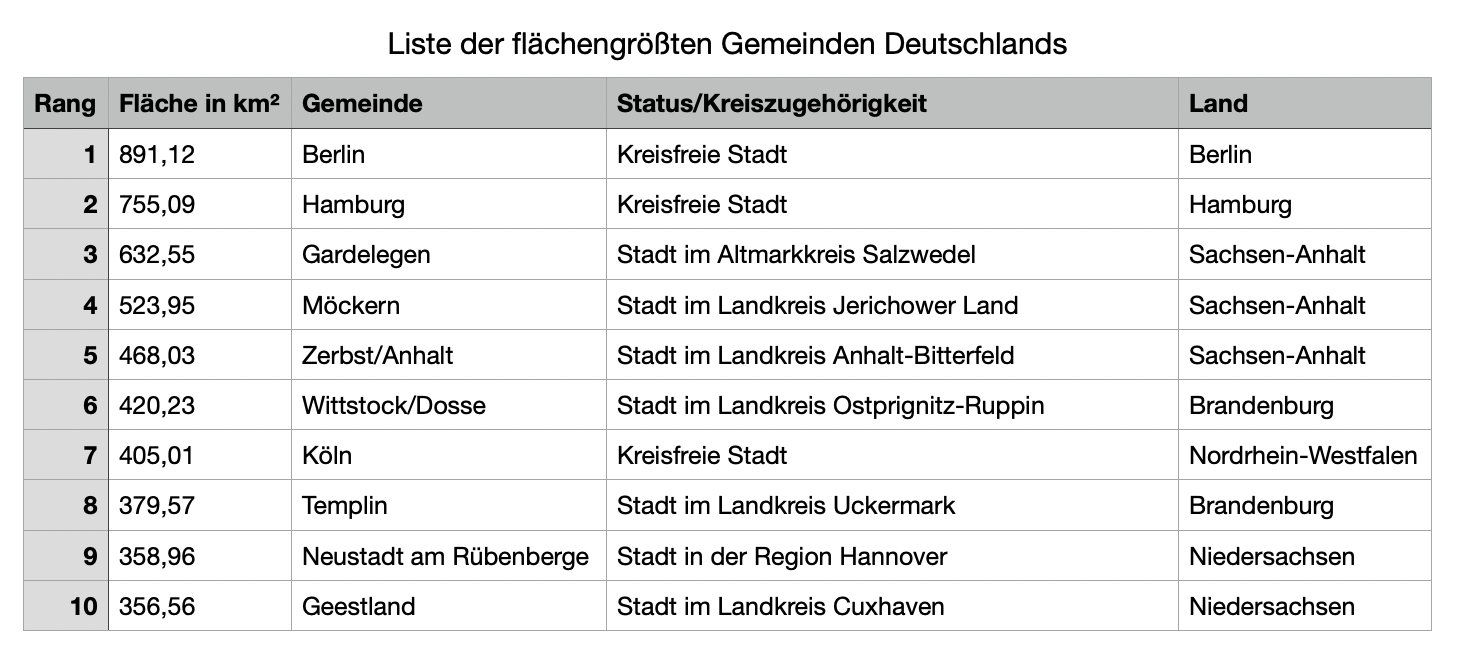

Wir haben unter Zuhilfenahme des `csv`-Moduls unseren eigenen Code geschrieben, um auszurechnen, wieviele der 100 flächengrößten Gemeinden sich in jedem der sechzehn Bundesländer befinden. In diesem Notebook lernen wir die sehr viel leistungsstärkere Bibliothek *pandas* kennen, die uns diese Rechnung im Handumdrehen liefern kann. Pandas kann aber viel mehr, wie wir gleich sehen werden.

Zu Beginn müssen wir pandas natürlich importieren. Folgendes Statement importiert die Bibliothek und verleiht ihr den Namen `pd`. Diese Abkürzung ist eine Konvention.

In [ ]:
import pandas as pd

Solltest Du einen `ModuleNotFoundError` erhalten, musst Du `pandas` erst über die Command Line installieren. Öffne dazu das Terminal (macOS) bzw. die Eingabeaufforderung (Windows) in einem neuen Fenster, gib `pip3 install pandas` (macOS) bzw. `pip install pandas` ein und drücke auf Enter. Sobald der Prozess abgeschlossen ist, sollte der Import oben klappen.

Um pandas kennenzulernen, wollen wir mit einem großen Datensatz arbeiten, nämlich dem [Songkorpus](https://songkorpus.de/index.html). Das Songkorpus beinhält Lieder von bekannten deutschen Künstler:innen, u.a. von Udo Lindenberg und Fettes Brot und umspannt die Jahre 1969-2022. Öffentlich herunterladbar sind unter anderem Worthäufigkeiten pro Jahr und zwar als Tabelle (auf der Webseite selbst finden sich weitere spannende Daten und Analysen). Jedes Wort, das in einem oder mehreren Songs in einem bestimmten Jahr vorkommt, steht in einer eigenen Zeile, zusammen mit dem entsprechenden Jahr und der Häufigkeit, mit der es in diesem Jahr bei allen Künstler:innen auftritt (s.u.). Insgesamt handelt es sich um über 380.000 Wörter. Solch eine tabellarische Datei, zumal derart groß, ist prädestiniert dazu, mit pandas verarbeitet zu werden.

## Input

In der folgenden Zelle öffnen wir die Datei, die sich bereits in "3_Dateien/Songkorpus" befindet, und lesen sie mit der pandas-Funktion `read_csv` ein, die neben dem Dateipfad u.a. auch das Trennzeichen (`sep`, in diesem Fall der Tabulator "\t") als Argument nimmt:

In [ ]:
#vor read_csv steht wie gewohnt der Modulname, damit Python weiß, wo sich die Funktion befindet
songkorpus = pd.read_csv("../3_Dateien/Songkorpus/songkorpus_token.tsv", sep="\t") 

Neben `read_csv` für Dateien mit Trennzeichen, bietet pandas u.a. auch Funktionen für XML (`read_xml`), JSON (`read_json`)  und Excel-Dateien (`read_excel`) an. Ebenfalls kann man je nach Daten weitere Parameter spezifizieren, u.a. `na_filter`, um zu definieren, wie mit fehlenden Werten (sog. *NaN-Werten*) umgegangen werden soll. 

*Bemerkung am Rande: Fehlende Werte führen immer wieder zu Problemen bei der Arbeit mit pandas. Deswegen solltest Du Dich beim Einlesen Deiner eigenen Daten stets fragen, ob bestimmte Werte darin fehlen könnten und wenn ja, wie Du damit umgehen möchtest. Pandas bietet neben `na_filter` nützliche Methoden wie `isna`, `dropna` und `fillna` für den Umgang mit fehlenden Werten (mehr Infos [hier](https://pandas.pydata.org/docs/user_guide/missing_data.html)). Im Folgenden gehen wir aber nicht darauf ein, im Songkorpus fehlen schlicht keine Werte.*

Die Lesemethode überführt unsere Daten in jedem Fall in ein sog. *DataFrame*: 

In [ ]:
print(type(songkorpus))

DataFrames sind ein eigener Datentyp von pandas, auf dem wir eine Vielzahl nützlicher Operationen ausführen können, etwa um einen Überblick über die Daten zu bekommen.

## Überblick bekommen

Hier bietet sich insbesondere die Methode `head` an, die standardmäßig die ersten fünf Zeilen (also den "Kopf") des DataFrames ausgibt: 

In [ ]:
songkorpus.head() #head nimmt optional eine Ganzzahl als Argument, die definiert, wieviele der ersten Zeilen ausgegeben werden sollen

Eher komische Wörter in der Spalte "CO_TOKEN". Wie wir an Spalte "CO_COUNT" erkennen können, kamen sie aber auch nur jeweils einmal (im angegeben Jahr in "CO_YEAR") vor.

Das Gegenstück zu `head` ist `tail` (also der "Schwanz"), wodurch wir die letzten fünf Zeilen des DataFrames erhalten:

In [ ]:
songkorpus.tail() #auch tail nimmt optional eine Ganzzahl als Argument, die definiert, wieviele der letzten Zeilen ausgegeben werden sollen

Die Ausgabe sieht übrigens anders aus, wenn wir einen `print`-Befehl verwenden, anstatt dass JupyterLab schlicht die letzte Zeile ausgibt (probier's aus!). Mit `print`-Befehl verschwindet die angenehme Formatierung.

Mithilfe von `shape`, `columns` und `index` können wir außerdem in Erfahrung bringen, welches Format (`shape`), d.h. wieviele Spalten und Zeilen, das DataFrame hat sowie, wie Spalten (`columns`) und Zeilen (`index`) benannt sind.

⚠️ Achtung: Es handelt sich dabei um sog. Attribute des DataFrames, die wir uns vereinfacht gesagt als Eigenschaften des DataFrames vorstellen können. Um auf ein Attribut eines Objekts zuzugreifen, hängt man den Namen des Attributs wie bei Methoden nach einem Punkt an das betreffende Objekt, schließt aber nicht mit Klammern ab:

In [ ]:
print(songkorpus.shape, songkorpus.columns, songkorpus.index, sep="\n")
original_len = len(songkorpus)

Unser DataFrame besteht also aus 386.510 Zeilen und drei Spalten. Die Anzahl an Zeilen, also die Länge des DataFrames, speichern wir in einer separaten Variablen ab, wir werden sie später noch brauchen.

Die Spaltennamen sind "CO_TOKEN", "CO_YEAR" und "CO_COUNT" und die Zeilen sind mit Indizes von 0 (inklusive) bis 386510 (exklusive) durchnummeriert. 

Die etwas kryptischen Spaltennamen können wir ändern, indem wir das Attribut `columns` unseres DataFrames ganz einfach mit einer Liste an neuen Spaltennamen überschreiben:

In [ ]:
songkorpus.columns = ["Wort", "Jahr", "Häufigkeit"]
print(songkorpus.columns)

Die Länge der Liste muss natürlich der Anzahl an Spalten entsprechen. 

Um eine spezifische Spalte zu überschreiben, können wir die `rename`-Methode verwenden, derer wir ein dictionary mit Schlüssel-Werte-Paaren ({"jetziger Name": "neuer Name"}) übergeben. Im Allgemeinen haben wir beim Bearbeiten eines DataFrames zwei Möglichkeiten, um die Bearbeitung wirksam zu machen: 

1) Wir können immer das alte DataFrame mit der bearbeiteten Version überschreiben. So haben wir das auch in der Zelle obendran gehandhabt. 
2) Bei der Bearbeitung mithilfe einer Methode, hier `rename`, können wir auch den Parameter `inplace=True` spezifizieren, um die Bearbeitung "an Ort und Stelle" vorzunehmen. 

In der nächsten Zelle sehen wir beide Alternativen. Im Folgenden beschränken wir uns aber auf die erste Möglichkeit, da diese auch abseits von Methoden funktioniert.

In [ ]:
songkorpus = songkorpus.rename(columns={"Wort": "Token"}) #1. Möglichkeit: Überschreiben
songkorpus.rename(columns={"Wort": "Token"}, inplace=True) #2. Möglichkeit: Bearbeiten "inplace"/"an Ort und Stelle"
songkorpus.head()

Schon kennen wir erste nützliche Operationen für einen ersten Eindruck unserer Daten.

***

## 🔧 Anwendungsfall: Wortverlaufskurven visualisieren 📈

Auch in diesem Notebook gibt es einen Anwendungsfall: Wir wollen visualisieren, wie häufig beliebige Wörter in jedem Jahr im vom Songkorpus abgedeckten Zeitraum 1969-2022 vorkommen. Für die Begriffe "ich", "du", "er" und "sie" sähe das z.B. so aus:

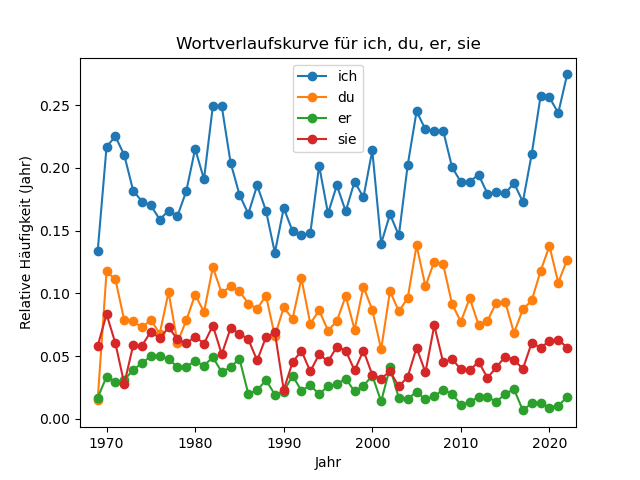

Es scheint, als sängen die Künstler:innen im Songkorpus bevorzugt über sich selbst, Trend: steigend. 😅

***

Zuallererst wollen wir einen detailierten Blick auf Spalten und Zeilen werfen, aus denen ein DataFrame ja besteht.

## Auf Spalten zugreifen

Wenn wir an einer bestimmten Spalte eines DataFrames interessiert sind, können wir auf diese mit der gleichen Syntax wie bei dictionaries zugreifen:

In [ ]:
songkorpus["Token"]

An dieser Stelle ist es natürlich wichtig, dass die Spalte aktuell wirklich "Token" und nicht mehr "CO_TOKEN" oder "Wort" heißt. Dies würde, wie bei inexistenten Schlüsseln in einem dictionary auch, zu einem `KeyError` führen.

Weiter funktioniert für den Spaltenzugriff auch die sog. dot-Notation nach dem Schema `DataFrame.column`:

In [ ]:
songkorpus.Token #beachte, dass hierfür der Spaltenname nicht als string, also ohne Anführungszeichen angehängt wird!

Die dot-Notation erfüllt (fast immer) die gleiche Funktion wie die Zugriffsweise über eckige Klammern, auf die wir uns fortan beschränken. 

In jedem Fall entspricht das, was wir dabei zurückerhalten, dem zweiten wichtigen Datentyp von pandas neben *DataFrame*, nämlich einer sog. *Series*:

In [ ]:
tokens = songkorpus["Token"]
print(type(tokens))

Series kann man mit Listen vergleichen. Sie sind im Gegensatz zu Dataframes nicht zweidimensional (Spalten und Zeilen), sondern eindimensional. Viele Listen-Operationen wie z.B. Indexing und Slicing funktionieren bei Series gleichermaßen:

In [ ]:
print(tokens[10000], "\n") #Indexing
print(tokens[9999:10002]) #Slicing

***

✏️ **Übung 1:** Erstelle eine weitere Series, die nur das 100.000te, 200.000te und 300.000te Token der Series `tokens` beinhält. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Anstatt *eines* Spaltennamens können wir auch eine Liste an Spaltennamen übergeben, um auf mehrere Spalten gleichzeitig zuzugreifen:

In [ ]:
two_columns = songkorpus[["Token", "Jahr"]].head() #beachte die inneren eckigen Klammern für die Liste!
two_columns

Überlege Dir kurz, was für ein Datentyp `two_columns` hat. 

Genau: Nun haben wir nicht mehr nur eine Spalte, in der Zeilenwert um Zeilenwert in einer Dimension gespeichert ist, sondern zwei Spalten. `two_columns` ist also immer noch ein zweidimensionales Objekt, sprich ein DataFrame:

In [ ]:
print(type(two_columns))

Nun wissen wir, wie wir auf Spalten zugreifen können. 

## Auf Zeilen zugreifen

Um auf Zeilen zuzugreifen, hängen wir `.loc[index]` an das DataFrame an und übergeben den Index der gewünschten Zeile anstelle von `index`:

In [ ]:
songkorpus.loc[777]

Verwende stets diese Syntax, um auf Zeilen zuzugreifen. 

Anfänger:innen versuchen oft, die Syntax `DataFrame[index]` zu verwenden. Das führt aber zu einem `KeyError`, denn diese Syntax ist dem Spaltenzugriff vorbehalten (sollte der übergebene `index` zufälligerweise auch ein Spaltenname sein, erhalten wir keinen `KeyError`, aber die Ausgabe entspricht dann auch der jeweiligen Spalte, und nicht der gewünschten Zeile).

Da wir bloß auf eine einzige Zeile zugreifen, in der Spaltenwert um Spaltenwert in einer Dimension gespeichert ist, liegt wieder der Datentyp Series vor:

In [ ]:
print(type(songkorpus.loc[777]))

Zur Verdeutlichung: Sowohl eine Sequenz von Werten einer Spalte als auch eine Sequenz von Werten einer Zeile entsprechen bei pandas einer Series. Entscheidend ist bloß, dass nur eine einzige Dimension vorliegt. Sobald ein Objekt sowohl mehrere Spalten als auch mehrere Zeilen umfasst, handelt es sich um ein DataFrame.

Ein solches Objekt können wir auch über `loc` erhalten, indem wir auf mehrere Zeilen gleichzeitig zugreifen. Dies funktioniert wie bei dem Zugriff auf mehrere Spalten (s.o), indem wir mehrere Indizes als Liste übergeben.

In [ ]:
print(type(songkorpus.loc[[777,888]])) #beachte die inneren eckigen Klammern für die Liste!
songkorpus.loc[[777,888]]

Zudem können wir auf mehrere aufeinanderfolgende Zeilen zugreifen, indem wir dieselbe Syntax wie bei Slicing verwenden:

In [ ]:
songkorpus.loc[777:780] #keine inneren eckigen Klammern!

Im Gegensatz zu gewöhnlichem Slicing bei Listen wird der letzte Index bei Pandas miteingerechnet ("inklusiv", vgl. zweites Notebook).

Abschließend sei erwähnt, dass Zeilen nicht zwingend mit *numerischen* Indizes durchnummeriert sein müssen. Zeilen können wie Spalten ebenfalls Namen haben. Dieses Szenario wollen wir in der nächsten Übung mit denselben Daten durchspielen.

***

✏️ **Übung 2:** 

1. Lies die Datei `songkorpus_tokens.tsv` abermals ein und übergib beim Erstellen des DataFrames zusätzlich den Parameter `index_col=0`. Dadurch wird die erste Spalte (mit dem Index 0), also diejenige mit den Tokens, zur sog. *Index-Spalte*. Jede Zeile hat nun statt eines numerischen Index einen Namen, nämlich das jeweilige Token. Weise das DataFrame der Variablen `songkorpus_labelled_rows` zu. 
2. Benenne die Spalten wie bei `songkorpus` um. Falls Du hier eine Fehlermeldung kriegst, lies sie aufmerksam und passe Deinen Code entsprechend an.
3. Überlege Dir, was die Tatsache, dass wir nun Tokens als Zeilennamen verwenden, zur Konsequenz hat. Experimentiere dazu gerne mit dem DataFrame herum und greife auf verschiedene Zeilen über Namen zu. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Im Gegensatz zu Spaltennamen (und Schlüsseln bei dictionaries) dürfen Zeilennamen mehrfach vorkommen. Der Zugriff auf eine oder mehrere Zeilen funktioniert ungeachtet dessen gleich wie bei DataFrames, die mit numerischen Indizes durchnummeriert sind, also mittels `.loc[index]`.

***

✏️ **Übung 3:** Setze die Tatsache, dass Zeilennamen mehrfach vorkommen dürfen, produktiv ein und finde heraus, wie oft "Dresden" in `songkorpus_labelled_rows` vorkommt, indem Du die Häufigkeiten in allen Jahren, in denen das Wort gesungen wird, zusammenzählst.

💡 Tipp: Der erste Schritt besteht darin, aus dem gesamten DataFrame `songkorpus_labelled_rows` ein kleineres, sog. *Sub-DataFrame* zu erstellen, das mit einer neuen Variablen referenziert wird. Der zweite Schritt besteht darin, eine Series aus diesem Sub-DataFrame "herauszuschneiden", die Du anschließend wie eine Liste behandeln kannst, um schließlich zur Anzahl der Nennungen von "Dresden" zu gelangen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

## Auf Spalten *und* Zeilen zugreifen

`loc` können wir ebenfalls verwenden, um gleichzeitig anzugeben, auf welche Spalte(n) und Zeile(n) wir bei einem DataFrame zugreifen möchten. Auf den Zeilenindex folgt nach einem Komma der gewünschte Spaltenname:

In [ ]:
print(songkorpus.loc[10, "Jahr"])

#Randbemerkung: Auf die Spitze getrieben, können wir mit .loc auch nur auf Spalten zugreifen, nämlich, indem wir 
#wie bei Listen-Slicing auch möglich, durch Weglassen eines Start- und Endindex sämtliche Zeilen ansprechen, sprich so: 
#songkorpus.loc[:, "Jahr"]

Neben der Herangehensweise über `loc` besteht auch die Möglichkeit erst wie oben gelernt auf eine spezifische Spalte bzw. eine spezifische Zeile zuzugreifen, was in einer Series resultiert, und in dieser Series anschließend auf eine bestimmte Zeile bzw. eine bestimmte Spalte zuzugreifen (z.B. `songkorpus["Token"][22]`). Obige Syntax mit `loc` ist diesen sog. "chained assignments" (etwa: Kettenaufgabe) jedoch vorzuziehen.

Wie immer können wir auch Listen übergeben, um auf mehrere Spalten und/oder mehrere Zeilen gleichzeitig zuzugreifen. Beim Zeilenzugriff funktioniert sowohl eine Liste einzelner Indizes...

In [ ]:
songkorpus.loc[[9999,10000], ["Token", "Häufigkeit"]]

...als auch die slicingähnliche Syntax für eine Sequenz an Zeilen:

In [ ]:
songkorpus.loc[9999:10005, ["Token", "Häufigkeit"]] 

Nun wissen wir, wie wir auf beliebige (Kombinationen) von Spalte(n) und Zeile(n) zugreifen können. Als Nächstes möchten wir unseren Daten erweitern, indem wir eine Spalte hinzufügen:

## Spalten hinzufügen

Eine einzelne Spalte entspricht ja einer Series und Series wiederum kommen Listen sehr nahe. Deshalb können wir zur Definition einer neuen Spalte ganz einfach eine Liste übergeben, deren Länge natürlich der Anzahl an Zeilen des DataFrames entsprechen muss.

Sagen wir, wir hätten gerne eine neue Spalte, in der das Jahrzehnt gespeichert wird, in der das jeweilige Token gesungen wurde. Die einzelnen Jahre haben wir schon, nun wollen wir aber jeweils zehn Jahre zu einem Jahrzehnt bündeln. 

Dazu können wir in gewohnter Python-Manier über die Spalte "Jahr" in `songkorpus` iterieren (auch bei der Iteration zieht die Analogie Series – Liste!), auf den jeweiligen Wert in der Spalte "Jahr" zugreifen, ihn in einen string casten und das Jahr reduziert auf das Jahrzehnt einer neuen Liste anhängen:

In [ ]:
decades = []
for year in songkorpus["Jahr"]:
    """Casten in einen string ist erforderlich, da sich Slicing nur auf sequentielle Objekte anwenden lässt 
    (Ganzzahlen gehören nicht dazu, vgl. zweites Notebook) und nur strings miteinander konkateniert werden können."""
    decade = str(year)[:-1] + "0"
    decades.append(decade)

Anschließend müssen wir nur noch eine neue Spalte in `songkorpus` definieren und ihr die Liste `decades` zuweisen. Das Erstellen einer neuen Spalte erfolgt genau gleich wie das Definieren eines neuen Schlüssels bei einem dictionary:

In [ ]:
songkorpus["Jahrzehnt"] = decades
songkorpus.head()

Recht simpel.

***

✏️ **Übung 4:**

Füge `songkorpus` eine weitere Spalte mit dem Namen "Länge" hinzu, in der die Anzahl Buchstaben je Token steht.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

✏️ **Übung 5:** Vereinfache den Code von oben, mit dessen Hilfe wir die Spalte "Jahrzehnt" hinzugefügt haben, indem Du ihn mittels List Comprehension (vgl. viertes Notebook) auf eine einzige Zeile reduzierst. Hole den Abschnitt zu List Comprehensions nach, falls Du ihn damals ausgelassen hast, da er als fortgeschritten markiert war.

Hinweis: `songkorpus` verfügt ja bereits über eine Spalte mit dem Namen "Jahrzehnt". Indem Du das Resultat Deiner List Comprehension `songkorpus["Jahrzehnt"]` zuweist, überschreibst du die befindliche Spalte ganz einfach.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Sehr gut. Zusätzlich zum klassischen `for`-Loop und der List Comprehension lernen wir weiter unten eine dritte, pandas-eigene Methode kennen, mit der wir den modifizierten Inhalt einer Spalte in eine andere schreiben können.

Schauen wir uns nun an, wie wir Zeilen zu einem DataFrame hinzufügen können.

## Zeilen hinzufügen

Auch neue Zeilen können wir einem DataFrame als Liste hinzufügen. Die Länge der Liste muss wiederum der Anzahl an Spalten entsprechen. 

Dies ist bei `new_row` in der nächsten Zelle nur der Fall, wenn Du in der Übung oben eine fünfte Spalte namens "Länge" hinzugefügt hast. Um sicherzustellen, dass `songkorpus` im Weiteren alle notwendigen Spalten umfasst, fügt die erste Zeile die Spalte "Länge" mittels List Comprension hinzu (bzw. überschreibt eine bereits vorhandene).

In [ ]:
songkorpus["Länge"] = [len(str(token)) for token in songkorpus["Token"]]
new_row = ["Fantasiewort", 2023, 800, 2020, 12]

`new_row` können wir `songkorpus` nun unter Verwendung der bereits bekannten `.loc[index]`-Syntax hinzufügen. Als `index` geben wir schlicht den letzten numerischen Index + 1 an, was der Länge von `songkorpus` entspricht (die numerischen Indizes fangen ja bei 0 an):

In [ ]:
songkorpus.loc[len(songkorpus)] = new_row
songkorpus.tail()

Wenn Du diese Zelle mehrfach ausführst, wird `new_row` jedes einzelne Mal hinzugefügt. Schließlich entspricht `len(songkorpus)` jedes Mal dem letzten numerischen Index + 1. 

Anstatt eine Zeile am Ende eines DataFrames hinzuzufügen, kannst Du die gleiche Syntax verwenden, um eine bestimmte, bereits existierende Zeile zu überschreiben. Das tun wir hier aber nicht, da wir mit den originalen Daten weiterarbeiten möchten. Entsprechend wollen wir die letzte(n) Zeile(n) mit Fantasiewörtern auch wieder entfernen.

## Spalten und Zeilen entfernen

Zu diesem Zweck gibt es die `drop`-Methode, die wir sowohl zum Entfernen von Spalten als auch Zeilen benutzen können. Als erstes Argument übergeben wir ihr den Namen der zu entfernenden Spalte bzw. den numerischen Index (oder Namen, s.o.) der zu entfernenden Zeile. Um mehrere Spalten oder Zeilen zu entfernen, können jeweils auch Listen übergeben werden. Anschließend spezifizieren wir mithilfe des `axis`-Parameters, ob es sich um eine Spalte oder eine Zeile handelt, die entfernt werden soll. `axis=1` steht für Spalten und `axis=0` für Zeilen (was der Standardwert ist und nicht zwingend angegeben werden muss). Die Syntax mit Standardwerten lautet also folgendermaßen:

`DataFrame.drop(index_or_name, axis=0)`

***

✏️ **Übung 6:** Führe die Zelle oben, in der wir `songkorpus` Zeilen mit Fantasiewörtern hinzugefügt haben, noch ein paar Mal aus, ohne darauf zu achten wie oft. Verwende nun `drop` in einer geeigneten Kontrollstruktur (vgl. drittes Notebook) sowie die anfangs eingeführte Variable `original_len`, um die Fantasiewörter wieder zu entfernen und `songkorpus`, was die Anzahl an Zeilen betrifft, wieder in seinen Originalzustand zu bringen. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Wunderbar! 

## Deskriptive Statistiken

Einige der Spalten in `songkorpus` enthalten ja numerische Werte, konkret die Spalten "Jahr", "Häufigkeit" und "Länge" (die Werte in "Jahrzehnt" haben wir als string abgespeichert, s.o.). Numerischen Werten nähern wir uns am besten über despriptive Statistiken, also etwa über Minimal- und Maximalwerte.

Pandas bietet dafür eine Reihe nützlicher Methoden: Angewandt auf eine Spalte, gibt `min` den kleinsten Wert darin zurück, `max` den größten, `mean` den Durchschnitt, `median` den Median und `sum` die Summe aller Werte:

In [ ]:
print(songkorpus["Häufigkeit"].min())
print(songkorpus["Häufigkeit"].max())
print(songkorpus["Häufigkeit"].mean())
print(songkorpus["Häufigkeit"].median())
print(songkorpus["Häufigkeit"].sum())

Wenig überraschend ist 1 der kleinste Wert in der Spalte "Häufigkeit". Wörter, die gar nie vorkommen, befinden sich ja nicht im Datensatz. 

Spannend ist jedoch, zu erfahren, dass das meistgesungene Token 2007 Mal in einen bestimmten Jahr vorkommt. Interessant ist auch, dass der Durchschnitt zwar bei fast 6 Nennungen liegt, mindestens die Hälfte aller Werte jedoch genau 1 sind. Der Median ist ja der Wert, der genau in der Mitte aller "aufgereihten" Werte steht: links von ihm können also nur weitere Einsen stehen, in der Mitte steht selbst auch eine 1. Diese Logik funktioniert natürlich nur, weil wir wissen, dass alle Werte in dieser Spalte Ganzzahlen sind.

Einen kompakten Überblick über diese und ein paar weitere Statistiken liefert auch `describe`:

In [ ]:
songkorpus["Häufigkeit"].describe() #entgegen ihrer Bezeichnung liefert describe auch die nicht-deskriptive, sondern inferentielle Standardabweichung (std)

Dabei lernen wir u.a., dass drei Viertel aller Tokens nur maximal drei Mal in einem bestimmten Jahr vorkommen.

`describe` lässt sich nicht nur auf eine Series, sondern auch auf ein DataFrame anwenden, wobei wir die Statistiken nur bei Spalten mit numerischen Werten zurückerhalten:

In [ ]:
songkorpus.describe()

Sehr nützlich ist auch die `value_counts`-Methode, die sämtliche Werte in einer Spalte auszählt und uns eine Art Frequenzwörterbuch zurückgibt. Die Methode liefert also genau das, was wir im fünften Notebook manuell für die 100 flächengrößten Gemeinden Deutschlands errechnet haben:

In [ ]:
songkorpus["Jahrzehnt"].value_counts()

Die Zehnerjahre sind dieser Auswertung zufolge am häufigsten vertreten im `songkorpus`. 

Da absolute Zahlen oft schwer miteinander zu vergleichen sind, bietet `value_counts` auch die Möglichkeit, die Werte zu normalisieren, d.h. relativ auszugeben. Dazu spezifizieren wir ganz einfach `normalize=True`:

In [ ]:
songkorpus["Jahrzehnt"].value_counts(normalize=True)

So lässt sich leicht ablesen, dass fast die Hälfte aller Tokens in `songkorpus` aus den Nuller- und Zehnerjahren stammen. Dieses Ungleichgewicht müssen wir bei künftigen Analysen im Hinterkopf behalten.

***

✏️ **Übung 7:** Mithilfe von `describe` haben wir oben herausgefunden, dass die durchschnittliche Wortlänge in `songkorpus` 6.88 Buchstaben beträgt. Die maximale Wortlänge beträgt hingegen sagenhafte 53 Buchstaben. Die Verteilung scheint alles andere als gleichmäßig zu sein, was wir auch an den sog. *Quartilen* 25% und 75% sehen (Quartile werden wie der Median berechnet, nur geht es nicht um den Mittelwert sondern um die Werte nach einem Viertel bzw. drei Vierteln aller aufgereihten Werte). Finde heraus, welche Wortlängen für jeweils mindestens 10 % aller Wörter gelten. Finde ebenfalls heraus, welche Wortlängen für jeweils maximal 1 % aller Wörter gelten.

💡 Tipp: Einer von verschiedenen denkbaren Lösungswegen involviert die Tatsache, dass DataFrames und Series mit dictionaries verwandt sind und sich auch in ein solches casten lassen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




*** 

Zwei weitere hilfreiche Methoden sind `nlargest` und `nsmallest`, die das DataFrame nach einer bestimmten Spalte (spezifiziert als zweites Argument) sortieren und die *n* (spezifiziert als erstes Argument) obersten bzw. untersten Zeilen ausgibt. Folgender Code liefert also die obersten zehn Zeilen eines nach der Spalte "Häufigkeit" absteigend sortierten DataFrames:

In [ ]:
songkorpus.nlargest(10, "Häufigkeit")

Wasser auf die Mühlen der Selbstbezogenheitsthese! 😅

Natürlich können wir ein DataFrame auch als Ganzes sortieren, anstatt bloß die *n* obersten bzw. untersten Zeilen zurückzukriegen.

## Werte sortieren

Dazu benutzen wir die Methode `sort_values`, der wir als erstes Argument die Spalte übergeben, anhand derer wir sortieren wollen, und als zweites Argument die Richtung der Sortierung, wobei `ascending=True` für aufsteigend (Standardwert) und `ascending=False` für absteigend steht.

Folgender Code sortiert `songkorpus` aufsteigend nach der Spalte "Jahr":

In [ ]:
songkorpus = songkorpus.sort_values("Jahr", ascending=True)
songkorpus.head()

Nach der Verwendung von `sort_values` lohnt es sich i.d.R., den Index des DataFrames, der ja durch die Sortierung ganz durcheinander geraten ist, zurückzusetzen. Dies können wir mithilfe von `reset_index` tun. Zusätzlich spezifizieren wir, dass der alte Index gelöscht werden soll (`drop=True`), andernfalls wird er in einer neuen Spalte gespeichert):

In [ ]:
songkorpus = songkorpus.reset_index(drop=True)
songkorpus.head()

Würden wir den Index nicht zurücksetzen, bekämen wir beim Zeilenzugriff über `loc` u.U. nicht die Ergebnisse zurück, die wir erwarten. Etwa erhielten wir über `songkorpus.loc[0]` nicht die erste Zeile des neuen DataFrames zurück, sondern die erste Zeile des alten, unsortierten DataFrames. Das liegt daran, dass Zeilen ihre Indizes bei der Sortierung standardmäßig behalten. Dieses Verhalten wird verständlicher, wenn Du Dir vorstellst, Du würdest `songkorpus_labelled_rows` sortieren. 

Wenn wir weder an der Häufigkeitsverteilung aller Werte in einer bestimmten Spalte (`value_counts`), noch an deren Reihenfolge (`nlargest`, `nsmallest` und `sort_values`) interessiert sind, sondern an der bloßen Existenz eines Wertes (egal wie oft er auftritt), gibt es eine weitere praktische Methode.

## Einzigartige Werte

Nämlich `unique`, das ähnlich wie die Python-Funktion `set` (vgl. zweites Notebook) alle einzigartigen Werte in einer bestimmten Spalte zurückgibt:

In [ ]:
songkorpus["Jahr"].unique()

***

✏️ **Übung 8:** Wir wissen bereits, wieviele Tokens in unserem DataFrame vorkommen, nämlich 386.510. Finde heraus, wieviele einzigartige Token, also Types (vgl. viertes Notebook) es gibt.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

## DataFrame filtern 

Als nächstes wollen wir herausfinden, wie wir ein DataFrame filtern können. Die grundlegende Syntax sieht wie folgt aus:

`DataFrame[filter]`

`filter` wiederum kann unterschiedlich ausschauen, je nach dem, wie wir unser DataFrame filtern wollen. Ein einfaches Beispiel für `filter` sieht so aus:

`DataFrame[column] == value`

Dieser Filter verlangt, dass bei `DataFrame` in der Spalte `column` exakt der Wert `value` steht.

Fügen wir diesen Filter in der obigen Syntax ein und schaffen ein Sub-DataFrame, das alle Zeilen des `songkorpus` beinhält, in denen in der Spalte `Token` das Wort "Liebe" steht:

In [ ]:
liebe = songkorpus[songkorpus["Token"] == "Liebe"]
liebe.head(5)

Das klappt wunderbar. Spiel gerne mit anderen Begriffen herum.

***

✏️ **Übung 9:** Erstelle ein Sub-DataFrame, das nur Tokens beinhält, die mindestes 20 Zeichen lang sind.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Abgsehen von Vergleichsoperatoren (`==`, `!=`, `>`, `<`, `>=` und `<=`, vgl. erstes Notebook) bei numerischen Werten (alle Operatoren) bzw. strings (nur die ersten beiden) können wir bei strings auch andere Methoden in den Filter einbauen. Pandas bietet sowohl solche an, die wir bereits von gewöhnlichen strings kennen (vgl. viertes Notebook), als auch ein paar eigene. Wichtig ist, dass die Methoden die Boolschen Werte `True` oder `False` zurückgeben. Das heißt, `startswith` funktioniert, `split` hingegen nicht. String-Methoden bei pandas beginnen immer mit `str`, gefolgt von der Methode, also etwa `str.startswith()`. Außerdem müssen wir ihnen in vielen Fällen den Paramter `na=False` übergeben. Hier ein paar Beispiele:

In [ ]:
liebe_startswith = songkorpus[songkorpus["Token"].str.startswith("liebe", na=False)] #wie normale string-Methode in Python
liebe_endswith = songkorpus[songkorpus["Token"].str.endswith("liebe", na=False)] #wie normale string-Methode in Python
liebe_contains = songkorpus[songkorpus["Token"].str.contains("liebe", na=False)] #pandas-eigene Methode

print(len(liebe_startswith), len(liebe_endswith), len(liebe_contains))
liebe_contains

***

✏️ **Übung 10:** Erstelle das gleiche Sub-DataFrame wie in Übung 9 (also eines, das nur Tokens beinhält, die mindestes 20 Zeichen lang sind), allerdings ohne dabei die Spalte "Länge" zu bemühen. Du kannst dazu eine Methode verwenden, die auch bei normalen strings funktioniert. Stelle sicher, dass die Ergebnisse der beiden Übungen identisch sind.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Gut zu wissen: Filter können auch miteinander kombiniert werden. Dazu verwenden wir die logischen Operatoren aus dem vierten Notebook, die bei pandas allerdings in einem anderen Gewand daherkommen:

- `&` steht für für `and`
- `|` steht für `or` 

Außerdem steht `~` steht für `not` und kann zur Negation eines einzelnen Filters benutzt werden.

Unter Verwendung von `&` können wir beispielsweise alle (potentiellen) regelmäßigen Partizip II-Formen extrahieren:

In [ ]:
songkorpus[songkorpus["Token"].str.startswith("ge", na=False) & songkorpus["Token"].str.endswith("t", na=False)]

Bedenke, dass auch falsch positive Ergebnisse dabei sein könnten sowie, dass falsch negative fehlen könnten (vgl. fünftes Notebook).

Nun wissen wir, wie wir ein DataFrame filtern können. 

## Werte zählen

Dieses Wissen können wir auch einsetzen, um spezifische Werte – im Gegensatz zu allen Werten wie bei `value_counts` oben – in einer Spalte auszuzählen:

In [ ]:
len(songkorpus[songkorpus["Token"] == "Wunderkind"])

Wir filtern also das DataFrame ("alle Zeilen, in denen 'Wunderkind' in der Spalte 'Token' steht") und lassen uns ganz einfach seine Länge (sprich die Anzahl an Zeilen) ausgeben.

## Werte bearbeiten

Auch zum Bearbeiten von Werten benötigen wir nur bereits erlerntes Wissen. Grundsätzlich können wir alles von einem kompletten DataFrame, über eine Series (in Form einer Spalte oder Zeile) bis hin zu einzelnen, spezifischen Werten bearbeiten. 

Die Möglichkeiten der Bearbeitung hängen natürlich vom Datentyp der Werte ab. In unserem DataFrame haben wir einerseits strings und andererseits numerische Werte und Spalten weisen jeweils einen homogen Datentyp auf.

Die Logik ist unabhängig davon, was wir wie bearbeiten, immer die gleiche: Wir greifen auf den gewünschten Ausschnitt des DataFrames zu (s.o.) und überschreiben ihn mit demselben Ausschnitt in bearbeiteter Form. Anstatt Überschreiben können wir die bearbeiteten Werte natürlich immer auch einer neuen Spalte oder Zeile (desgleichen oder eines neuen DataFrames) zuweisen, sofern die jeweiligen Dimensionen übereinstimmen  (s.o.). 

### Strings

Auf strings angewandt, sieht das so aus, wenn wir etwa alle Tokens kleinschreiben wollen. Auch hier setzen wir `str` vor die pandas-string-Methode:

In [ ]:
songkorpus["Token"] = songkorpus["Token"].str.lower()
songkorpus

Diese einzeilige Syntax hat es in sich: Man kann sie sich in gewohnter Python-Logik wie eine Iteration vorstellen: Im vorliegenden Fall wird Wort für Wort (in der Spalte "Token") kleingeschrieben. Mit dem Resultat wird die Spalte überschrieben. Sie ist dennoch nicht mit einer List Comprehension, die ja auch nur eine einzige Zeile benötigt, zu verwechseln. Denn im Gegensatz zu pythonischen `for`-Loops und ihre simplifizierte Version List Comprehension, wird der Code mit der pandas-eigenen Syntax oft wesentlich schneller berechnet (teils über 1000 Mal schneller!). Grund dafür ist die sog. *Vektorisierung*. Ganz einfach forumuliert wird dabei dieselbe Operation nicht auf ein Element nach dem anderen angewandt (wie bei `for`-Loops), sondern auf mehrere gleichzeitig. Außerdem sind pandas-Operationen im Gegensatz zu nativem Python-Code (`for`-Loops) speziell auf Effizienz ausgelegt. Wenn Du Dich dafür interessierst, findest Du u.a. in [diesem Artikel](https://medium.com/analytics-vidhya/understanding-vectorization-in-numpy-and-pandas-188b6ebc5398) und [diesem Video](https://www.youtube.com/watch?v=nxWginnBklU) Anknüpfungspunkte. Weiter unten folgen Übungen zum Vergleich von nativem Python-Code und pandas-Code.

Zusätzlich zu den bisher verwendeten string-Methoden `lower`, `startswith`, `endswith` und `len` bietet pandas u.a. folgende an, die allesamt wie ihre nativen Python-Pendants funktionieren (vgl. viertes Notebook): 
- `upper`, `capitalize`, `swapcase`, `isupper` und `islower` zur Bearbeitung/Überprüfung von Groß-/Kleinschreibung der strings.
- `split` zum Splitten der strings, optional mit dem Parameter `expand=True`, um jedem unterteilten Element eine neue Spalte zuzuweisen.
- `replace` zum Ersetzen aller Vorkommen eines strings/regulären Ausdrucks (hier zusätzlich `regex=True` spezifizieren) mit einem anderen string.
- `count` zum Berechnen der Auftretenshäufigkeit eines strings/regulären Ausdrucks in den strings.
- `strip`, `lstrip` und `rstrip` zum Entfernen von (leading/trailing) whitespace in den strings.

Neben `contains` (s.o.) ist außerdem `slice` eine nützliche pandas-string-Methode, die abweichend von ihrem nativen Python-Pendant heißt: `slice` mit den Argumentenen `start`, `stop`, `step` implementiert die Funktionalität der eckigen Klammern, die wir bei normalen Python-strings zum Slicen verwenden.

[Hier](https://pandas.pydata.org/docs/user_guide/text.html) findest Du mehr Infos zu sämlichen string-Methoden bei pandas. Denke stets daran, `str` vor die jeweilige string-Methode zu hängen!

Eine letzte praktische Methode ist `isin(list)`. Sie überprüft, ob ein Wert Element der übergebenen Liste ist und gibt eine Series mit Boolschen Werten zurück. `isin` lässt nicht nur bei strings anwenden, deshalb hängen wir auch kein `str` davor.

### Numerische Werte

Bei numerischen Werten wiederum können wir ganz einfach arithmetische Operatoren (vgl. erstes Notebook) verwenden, etwa um alle Werte einer Spalte zu verdoppeln:

In [ ]:
#führe diese Zeile nur einmal aus, denn mit jedem Mal verdoppeln sich die Werte
songkorpus["Häufigkeit"] = songkorpus["Häufigkeit"] * 2
songkorpus

Hierfür funktionieren auch die anderen uns bekannten arithmetischen Operatoren: ```+``` für Addition (eignet sich überdies zur Konkatenation von strings), ```-``` für Subtraktion,  ```/``` für Division und ```**``` fürs Potenzieren. 

### Datentyp ändern

Sollten Werte mal im falschen Datentyp vorliegen, kann man (sofern sinnvoll) die Methode `astype` verwenden, um Werte in den gewünschten Datentyp zu casten. Wenn wir z.B. die Häufigkeiten wieder in den Originalzustand versetzen wollen, können wir erst alle Werte in der entsprechenden Spalte halbieren...

In [ ]:
songkorpus["Häufigkeit"] = songkorpus["Häufigkeit"] / 2
songkorpus

...und, da Resultat einer Division immer Dezimalzahlen sind (s. Nachkommastelle), anschließend in Ganzzahlen casten:

In [ ]:
songkorpus["Häufigkeit"] = songkorpus["Häufigkeit"].astype(int)
songkorpus

***

✏️ **Übung 11:** Oben haben wir die Spalte "Jahrzehnt" basierend auf den Jahreszahlen mithilfe eines `for`-Loops geschaffen. Gehe abermals von der Spalte "Jahr" aus, um eine neue Spalte "Jahrzehnt_ohne_Loop" zu schaffen, allerdings – wie der Name verrät – ohne dafür einen Loop, auch nicht in Form einer List Comprehension – zu benutzen. Mit anderen Worten: Du sollst Pandas-Syntax dafür einsetzen. Wenn Dein Code stimmt, ergibt die bereits geschriebene (derzeit auskommentierte) Zeile `True`.

💡 Tipp: Es sind dieselben einzelnen Schritte wie im `for`-Loop oben nötig, allerdings formuliert in pandas-Syntax. Gegebenfalls musst Du in der [pandas-Dokumentation](https://pandas.pydata.org/docs/) nachschlagen, wie die jeweilige Syntax der pandas-Pendants ausschaut. 

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben


#print(songkorpus["Jahrzehnt"].equals(songkorpus["Jahrzehnt_ohne_Loop"]))

***

Sehr gut! Die simple Iteration von oben, die sämtliche Werte nacheinander auf dieselbe Weise bearbeitet, können wir also auch ganz einfach in vektorisierter Form nachbilden. 

### Bedingte Bearbeitung

`for`-Loops bieten aber natürlich viel mehr Funktionalität. Etwa können wir bedingte Anweisungen einbauen, sodass die Werte je nach Bedingung unterschiedlich bearbeitet werden. Aber auch dafür bietet pandas, oder besser gesagt *numpy* (eine weitere Bibliothek, die eng mit pandas verwoben ist) eine Funktion, die sich Vektorisierung zunutze macht. Auch numpy müssen wir erst importieren (ggf. sogar noch zuerst installieren, s.o.), gängigerweise weisen wir der Bibliothek den Namen `np` zu:

In [ ]:
import numpy as np

Die Funktion heißt `where` und hat folgende Syntax:

`where(if, then, else)`

Als erstes Argument ("if") spezifizieren wir eine bedingte Anweisung, die bei jedem Wert entweder `True` oder `False` ergibt. Im Falle von `True` wird der Wert wie im zweiten Argument ("then") angegeben eingetragen bzw. bearbeitet. Andernfalls greift, was wir als drittes Argument ("else") definiert haben. 

Angenommen wir möchten zusätzlich zur Spalte "Jahrzehnt" eine Spalte "Jahrhundert", können wir `where` folgendermaßen dazu einsetzen:

In [ ]:
#vor where steht wie gewohnt der Modulname, damit Python weiß, wo sich die Funktion befindet
songkorpus["Jahrhundert"] = np.where(songkorpus["Jahr"] < 2000, "20. Jhd.", "21. Jhd.")
songkorpus

Sehr gut! Bedenke, dass die Begriffe `if` und `else`, die wir bei bedingten Anweisungen in normalem Python verwenden, nicht benötigt werden. Die Logik ergibt sich einzig über die Reihenfolge der Argumente in `where`.

In diesem Fall haben wir als "then" bzw. "else" ganz einfach strings übergeben, die je nach dem in der neuen Spalte "Jahrhundert" eingetragen wurden. In der folgenden Übung wollen wir bei "then" und "else" bestimmte Werte in der jeweilige Zeile bearbeiten.

***

✏️ **Übung 12:** Bearbeite die Werte in der Spalte "Token" so, dass jedes Wort, das aus genau fünf Buchstaben besteht, großgeschrieben wird. Einfach weil wir's können! 😉

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Super! 

Für den Fall, dass Du mehrere bedingte Anweisungen aneinanderhängen willst (`if`-`elif`-...-`else`) kannst Du statt `where` die Numpy-Funktion `select` benutzen. Wir setzen sie weiter unten noch ein.

### `apply` und `applymap`

Wie erwähnt ist die vektorisierte Art der Datenbearbeitung in pandas meistens äußerst effizient. Es gibt aber Fälle, in denen wir dennoch eine Funktion mit nativem Python-Code anwenden wollen. Entweder, weil pandas die benötigen Operationen nicht implementiert, oder weil es mit nativem Python-Code trotz allem effizienter ist (dazu gleich mehr).  

In jedem Fall bieten die Methoden `apply` und `applymap` die Möglichkeit, jede beliebige Funktion (und in der Verlängerung auch jede beliebige Methode) auf eine Series oder gleich ein ganzes DataFrame anzuwenden. `apply` verwenden wir bei einer Series, `applymap` bei einem ganzen DataFrame. Angehängt an die Series bzw. das DataFrame übergeben wir ihnen schlicht den Namen der gewünschten Funktion. Es spielt keine Rolle, ob die Funktion aus der Grundausstattung von Python stammt, importiert wurde oder von Dir selbst geschrieben ist.

Machen wir es konkret, und zwar in zwei kleinen Experimenten. Wir wollen die gleiche Art der Datenbearbeitung je einmal vektorisiert implementieren, und einmal über eine eigene Funktion, die wir mithilfe von `apply` auf die Daten *appli*zieren. Zum Verständnis: Rufen wir eine Funktion über `apply` (oder `applymap`) auf, wird dieser wie bei einem `for`-Loop *Wert für Wert* übergeben. Will heißen: Bei `apply` können wir nicht von der Verarbeitung mehrerer Daten auf einmal profitieren.

Für das erste Experiment rufen wir ein DataFrame ins Leben, das aus einer Million Zeilen und zwei Spalten, "A" und "B", besteht. Das DataFrame befüllen wir mit zufälligen Zahlen zwischen 0 und 100 (unter Verwendung der numpy-Funktion `random.randint`). Insgesamt also ein ziemlich großes DataFrame:

In [ ]:
exp1 = pd.DataFrame(np.random.randint(0,100, size=(1000000,2)), columns=["A", "B"])
exp1.head()

Nun wollen wir eine dritte Spalte "C" schaffen, die ganz einfach das jeweilige Produkt der Werte in den Spalten "A" und "B" enthält. In der ersten Zelle unten tun wir dies auf vektorisierte Weise, in der zweiten mithilfe einer eigenen Funktion und `apply`. Um zu messen, wie lange das jeweils dauert, verwenden wir das `time`-Modul aus der Grundausstattung von Python:

In [ ]:
#Vektorisiert
import time
start = time.time() #Zeit zum Startpunkt

exp1["C"] = exp1["A"] * exp1["B"]
vectorized = time.time()-start #Zeit nach Beendigung der Berechnung minus Startzeit, ergibt Dauer

exp1.head()

In [ ]:
#for-Loop
start = time.time() #Zeit zum Startpunkt

def multiply(row):
    return row["A"]*row["B"]

#dem Funktionsnamen (hier: multiply) folgen keine Klammern!
#axis=1 spezifiziert, dass wir die Funktion auf Spalten anwenden (s.o.)
exp1["C"] = exp1.apply(multiply, axis=1) 

for_loop = time.time()-start #Zeit nach Beendigung der Berechnung minus Startzeit, ergibt Dauer
exp1.head()

Die effektive Berechnungsdauer hängt von verschiedenen Faktoren ab und variiert auch zwischen mehreren Durchgängen. In jedem Fall aber sollte sich ein großer Unterschied zeigen. Typischerweise ist die vektorisierte Berechnung mehrere Hundert Male schneller als die Verwendung einer eigenen Python-Funktion:

In [ ]:
print("Vektorisiert:", vectorized, "\nfor-Loop", for_loop, "\nFaktor:", for_loop/vectorized)

Sehr eindrucksvoll! 

Gehen wir zum zweiten Experiment über, indem wir wieder ein DataFrame mit einer Million Zeilen, aber nur einer Spalte, "Satz", schaffen. Diesmal befüllen wir das DataFrame mit dem immergleichen string (unter Verwendung der numpy-Funktion `repeat`):

In [ ]:
exp2 = pd.DataFrame(np.repeat("Dies ist ein nicht besonders langer Satz.", 1000000, axis=0), columns=["Satz"])
exp2.tail()

Hier wollen wir ebenfalls eine weitere Spalte schaffen. Sie soll ganz unspektakulär die Anzahl an Wörtern des jeweiligen strings in der Spalte "Satz" enthalten. In diesem konstruierten Beispiel ergibt dies selbstverständlich immer sieben. Die erste Zelle enthält wieder die vektorisierte pandas-Variante, während die zweite über `apply` eine selbst geschriebene Funktion mit Python-Code aufruft.

In [ ]:
#Vektorisiert
start = time.time()

exp2["Länge"] = exp2["Satz"].str.split().str.len()

vectorized = time.time()-start

exp2.head()

In [ ]:
#for-Loop
start = time.time()

def split(sentence):
    return len(sentence.split())

#dem Funktionsnamen (hier: split) folgen keine Klammern!
exp2["Länge"] = exp2["Satz"].apply(split)
for_loop = time.time()-start

exp2.head()

Auch hier variieren die effektiven Berechnungszeiten mitunter stark, dennoch sollte sich zeigen, dass in diesem Fall die zweite Variante mit nativem Python-Code und `apply` um einiges schneller berechnet wird, selbst wenn der Faktor nicht gleich eindrucksvoll wie oben ist:

In [ ]:
print("Vektorisiert:", vectorized, "\nfor-Loop", for_loop, "\nFaktor:", vectorized/for_loop)

Wir können festhalten, dass Vektorisierung bei Zahlen unglaublich effizient ist. Bei der Bearbeitung von strings hinken pandas-Operationen, jedenfalls bei großen Datenmengen, nativem Python-Code hinterher. Es sei denn Du hast riesige Mengen an strings zu bearbeiten, empfiehlt sich der Einsatz von pandas-Operationen der Einheitlichkeit halber i.d.R. dennoch. 

***

✏️ **Übung 13:** Caste sämtliche Werte in `songkorpus` in strings.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

## 🔧 Anwendungsfall: Wortverlaufskurven visualisieren 📈

Im Anwendungsfall für dieses Notebook wollen wir wie gesagt Wortverlaufskurven visualisieren. Das heißt, wir wollen die Häufigkeit, mit der ein beliebiges Wort auftritt, über die Zeit hinweg darstellen. Für die vier Personalpronomen "ich", "du", "er" und "sie" sähe das z.B. wie in der kombinierten Grafik unten aus. Die linke Darstellung visualisiert die Daten nach einzelnen Jahren (wie der originale Datensatz), in der mittleren und rechten Darstellung werden die Daten aggregiert nach Fünfjahresperioden bzw. Jahrzehnten visualisiert. Einzelne Aussschläge nach oben und unten werden so ausgebügelt und Trends sind leichter zu erkennen:

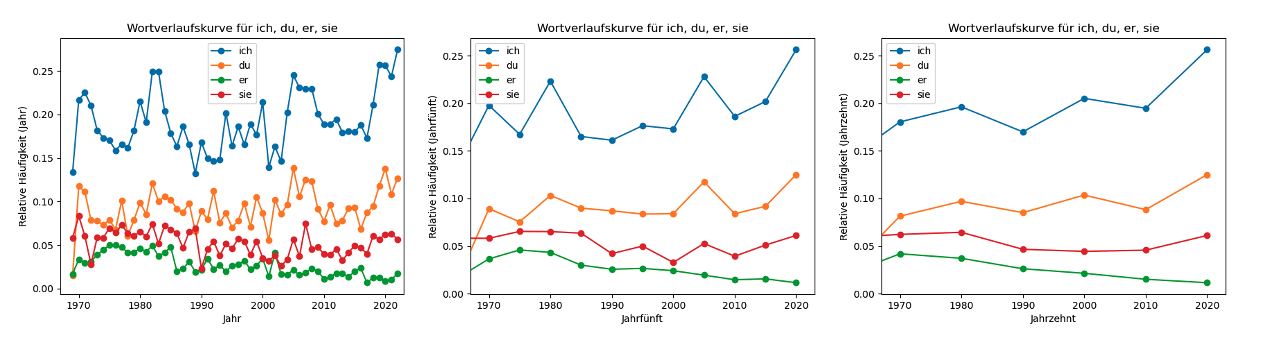

Deine Aufgabe ist es erst einmal, Code zu schreiben, der die linke Grafik (d.h. Häufigkeitsverteilung auf Einjahresbasis) für beliebige Wörter produziert. Die erforderliche Aggregation für die mittlere und rechte Darstellung schauen wir uns im Anschluss an den Anwendungsfall gemeinsam an. 

Wie im vierten und fünften Notebook hast Du wieder die Wahl, den Anwendungsfall ohne weitere Anleitung in Angriff zu nehmen oder einer Schritt-für-Schritt-Anleitung zu folgen. In letzterem Fall kannst Du jetzt ans Ende der nächsten Code-Zelle springen.

Wenn Du es alleine probieren möchstest, dann analysiere das gewünschte Resultat oben rechts und frage Dich, welche Daten wie und wo visualisiert werden sowie, ob sich diese Daten bereits im DataFrame befinden oder erst generiert werden müssen. Mach Dich ebenfalls in der [Dokumentation](https://matplotlib.org/stable/users/index.html) von matplotlib, der Bibliothek zum Visualisieren von Daten, schlau, wie Du dieses Resultat erreichst. Beginne in jedem Fall damit, die Datei "songkorpus.tsv" neu einzulesen und die Spalten wie am Anfang des Notebooks umzubenennen. Dadurch stellst Du sicher, dass Du auch wirklich mit den ursprünglichen Daten arbeitest.

Viel Erfolg! 🙌

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben.





















*** 

**Schritt-für-Schritt-Anleitung**

1. Um sicherzugehen, dass wir wirklich mit den originalen Daten arbeiten, lies die Datei "songkorpus_token.tsv" abermals ein. 

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




2. Benenne die Spalten in "Token", "Jahr" und "Häufigkeit" um.

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




3. Im DataFrame verfügen wir bislang nur über absolute Häufigkeiten. Um die Werte zwischen einzelnen Jahren besser vergleichbar zu machen, wollen wir aber relative Häufigkeiten für die Visualisierung verwenden. Schaffe dazu eine Spalte "Relative Häufigkeit", die für jedes Token vermerkt, wie häufig es in Relation zu allen Tokens im gegebenen Jahr vorkommt. Für diese Berechnung brauchst Du jeweils zwei Werte: die absolute Häufigkeit (bereits in der Spalte "Häufigkeit") und die Gesamtzahl an Tokens im gegebenen Jahr. Ersteres musst Du dann durch letzteres teilen. Die Gesamtanzahl an Token pro Jahr kannst Du mithilfe von `value_counts` ermitteln. Schaue Dir das Ergebnis davon an. Es handelt sich um eine Series, die wir aber wie ein dictionary behandeln können. Wir können das Ergebnis somit einer Methode namens `replace` übergeben und auf die Spalte "Jahr" anwenden. Dadurch wird jedes Jahr durch die jeweilige Gesamtzahl an Token ersetzt. 

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




4. Installiere ggf. `matplotlib` über das Terminal oder die Eingabeaufforderung und importiere anschließend `matplotlib.pyplot as plt` (wieder so eine gängige Abkürzung). matplotlib ist die Bibliothek, die wir zum Visualisieren unserer Daten verwenden. Mithilfe der Funktion `plot(x, y)` (denk an den Modulnamen davor) können wir einfach Grafiken produzieren. `x` ist dabei eine Liste oder Series an Werten, die auf der x-Achse abgebildet werden sollen und `y` eine Liste oder Series derjenigen Werte, die auf der y-Achse dargestellt werden sollen. `x` und `y` müssen gleich lange sein. Konkret wird der erste Punkt in der Grafik bei den Koordinaten `x[0]` und `y[0]` eingezeichnet, der zweite bei `x[1]` und `y[1]`, etc. Standardmäßig werden die einzelnen Punkte wie oben zu einem Graphen verbunden. Schau in den Beispieldarstellungen oben, welche Werte wir entlang der x-Achse bzw. entlang der y-Achsen plotten wollen. 

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




5. Definiere eine Liste an Wörtern, die Du visualisieren möchtest. Diesen Schritt kannst Du auch interaktiv umsetzen, sodass Du bei jeder Ausführung aufgefordert wirst, Wörter zur Visualisierung anzugeben.

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




6. Plotte nun nacheinander eine Verlaufskurve für jedes Wort auf der Liste. Gehe dazu für jedes Wort wie folgt vor:
    - Schaffe ein Sub-DataFrame, in dem in der Spalte "Token" nur das gegebene Wort steht.
    - Sortiere das Sub-DataFrame aufsteigend nach der Spalte "Jahr" und setze den Index anschließend zurück.
    - Übergib der `plot`-Funktion die relevanten Spalten des Sub-DataFrames an Stelle von `x` und `y`. Übergib als drittes Argument den string "o-", der den Stil des Graphen (Linie mit Punkten) definiert.

7. Nachdem Du alle Wörter der Liste entsprechend geplotted hast, kannst Du **in derselben Zelle** folgende Funktionen verwenden, um den Plot zu verfeinern:
    - `title`, um einen Titel zu setzen.
    - `xlabel` und  `ylabel`, um die Achsen zu beschriften.
    - `xlim`, um der x-Achse Grenzen zu setzen, z.B. von 1969 bis 2022 (dies vereinheitlicht die Plots, da diese sonst automatisch an den Wertebereich der zu plottenden Wörter angepasst wird und der Plot dadurch mitunter anders beschnitten sein kann).
    - `legend`, um eine Legende einzufügen, indem Du der Funktion die Liste mit Wörtern übergibst

In [ ]:
#In diese Zelle kannst Du den Code zur Aufgabe schreiben.




***

Super! 🤩

Bevor wir uns zum Abschluss noch den Output von DataFrames anschauen, wollen wir die Daten wie gesagt zu größeren Zeiteinheiten aggregieren. Hier kommen zwei neue Methoden ins Spiel, `groupby` und `aggregate`, die beide sehr nützlich sind. Es handelt sich aber um fortgeschrittene Techniken, weswegen wir sie hier nur ganz konkret durchspielen, ohne auf ihren sehr breiten Einsatzbereich einzugehen. 

Um die Verlaufskurve in Zehn- und Fünfjahresabschnitte zu unterteilen, müssen wir erst wieder die Spalte "Jahrzehnt" definieren (wir haben den Songkorpus ja in der Zwischenzeit neu geöffnet). Dazu verwenden wir nun natürlich die pandas-eigene Syntax und weisen den finalen Werten zusätzlich den Datentyp `int` zu:

In [ ]:
songkorpus["Jahrzehnt"] = (songkorpus["Jahr"].astype(str).str.slice(0,-1) + "0").astype(int)

Eine Spalte mit sog. *Jahrfünften* können wir nun unter Verwendung von numpys `select` erstellen. Dazu definieren wir zwei Listen, eine mit "if"-Bedingungen (etwa "Wert in Spalte 'Jahr' kleiner als 1970...") und eine mit "then"-Statements ("...dann setze den Wert 1965 ein"). Diese Listen übergeben wir der Funktion zusammen mit dem dritten Argument, das ganz einfach im "else"-Fall greift. Bedenke, dass die Reihenfolge der Elemente auf den beiden Listen ebenso wie die Reihenfolge von `if`-`elif`-...-Statements in normalem Python-Code entscheidend ist.

In [ ]:
x = songkorpus["Jahr"]
if_list   = [x<1970, x<1975, x<1980, x<1985, x<1990, x<1995, x<2000, x<2005, x<2010, x<2015, x<2020] #hier zeigt sich auch, warum wir die Spalte "Jahr" oben in Ganzzahlen gecasted haben
then_list = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
songkorpus["Jahrfünft"] = np.select(if_list, then_list, 2020)
songkorpus.head()

Die relativen Häufigkeiten müssen wir nun ebenfalls für die beiden neuen Zeiteinheiten berechnen:

In [ ]:
songkorpus["Relative Häufigkeit (Jahr)"] = songkorpus["Häufigkeit"] / songkorpus["Jahr"].replace(songkorpus["Jahr"].value_counts()) #Zur Sicherstellung, dass auch diese Spalte existiert
songkorpus["Relative Häufigkeit (Jahrfünft)"] = songkorpus["Häufigkeit"] / songkorpus["Jahrfünft"].replace(songkorpus["Jahrfünft"].value_counts())    
songkorpus["Relative Häufigkeit (Jahrzehnt)"] = songkorpus["Häufigkeit"] / songkorpus["Jahrzehnt"].replace(songkorpus["Jahrzehnt"].value_counts())    

Nun fehlt nur noch der Aggregationsschritt. Bei den jahresbasierten relativen Häufigkeiten konnten wir uns ja darauf verlassen, dass jedes Wort nur ein einziges Mal pro Jahr vorkommt, so sind unsere Daten ganz einfach strukturiert. 

Bei den Jahrfünften und Jahrzehnten kann ein einzelnes Wort aber bis zu fünf bzw. zehn Mal vorkommen, mit jeweils unterschiedlichen, aber viel geringeren relativen Häufigkeiten (viel geringer, da wir die absoluten Häufigkeiten durch eine größere Zahl teilten). Wir müssen alle relativen Häufigkeiten pro Wort und Jahrfünft bzw. Jahrzehnt also aufsummieren. Genau dies geschieht im neu eingefügten Aggregationsschritt unten: Das Sub-DataFrame wird nach den jeweiligen Jahrfünften bzw. Jahrzehnten gruppiert (`groupby`; man kann sich das wie gefilterte Sub-Sub-DataFrames vorstellen) und in diesen Gruppen wird die jeweilige Spalte mit den relativen Häufigkeiten aufsummiert. 

Abgesehen vom Aggregationsschritt, wurde im Code unten die Variable `span` für die Zeiteinheit eingesetzt, sodass diese neben zu den zu plottenden Wörtern initial definiert werden kann:

In [ ]:
import matplotlib.pyplot as plt

span = "Jahrzehnt"
words = ["ich", "du", "er", "sie"]

#Iterieren über die zu plottenden Wörter
for word in words:
    #Schaffen eines Sub-DataFrames über Filter
    word_df = songkorpus[songkorpus["Token"] == word]
    
    """NEUER SCHRITT: AGGREGATION"""
    word_df = word_df.groupby([span]).aggregate({f"Relative Häufigkeit ({span})": "sum"})
    """NEUER SCHRITT: AGGREGATION"""
    
    #Sortieren des Sub-DataFrames nach der Spalte "Jahr" und Zurücksetzen des Index
    word_df = word_df.sort_values(by=span, ascending=True).reset_index()
    #Definieren von x und y, "Jahr" soll auf x-Achse geplotted werden, "Relative Häufigkeit" auf y-Achse
    x = word_df[span]
    y = word_df[f"Relative Häufigkeit ({span})"]
    #Eigentliches Plotten
    plt.plot(x, y, 'o-')

#Zusätzliches Verfeinern und Beschriften des Plots
plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])}")
plt.xlabel(span)
plt.ylabel(f"Relative Häufigkeit ({span})")
plt.xlim(1967, 2023)
plt.legend(words, loc="best")

Wunderbar. 

Mit `plt.savefig(path)` kannst Du Grafiken übrigens auch auf Deiner Festplatte speichern.

Damit sind wir fast am Ende des Notebooks angelangt.

## Output

Übrig bleibt noch, die Methode `to_csv` vorzustellen, die wir verwenden können, um ein DataFrame als kommaseparierte Datei extern zu speichern:

In [ ]:
songkorpus.to_csv("../3_Dateien/Output/songkorpus_new.csv", sep="\t", encoding="utf-8")

Neben dem Ausgabepfad können wir das gewünschte Trennzeichen und Encoding spezifizieren. Neben `to_csv` gibt es analog zum Input auch spezifische Output-Methoden für XML (`to_xml`), JSON (`to_json`) und Excel (`to_excel`).

Damit sind wir am Ende des Notebooks angelangt. Gute Arbeit!